In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

# Load Data

In [9]:
edm = pd.read_csv('xAPI-Edu-Data.csv')
edm.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# One Hat Encoding

In [10]:
data_T = edm.copy()
data_T['Class'] = [1 if x == 'L' else 2 if x == 'M'  else 3 for x in data_T['Class']]
y = data_T['Class']
Features = data_T.loc[:, 'gender':'StudentAbsenceDays']



In [11]:
print("Original features:\n", list(Features.columns), "\n")
data_dummies = pd.get_dummies(Features)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays'] 

Features after get_dummies:
 ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebano

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_dummies, y,  random_state=42)


In [13]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

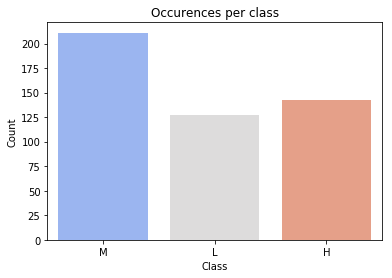

In [14]:
# Counts per class --> Is the dataset unbalanced?
counts = sns.countplot(x='Class', data=edm, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

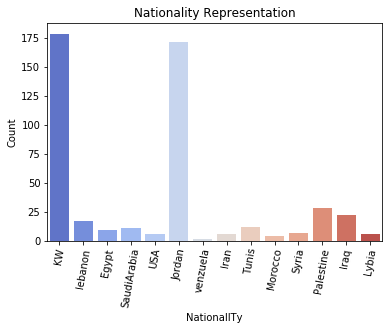

In [15]:
# Exploring nationalities
nat = sns.countplot(x='NationalITy', data=edm, palette='coolwarm')
nat.set(xlabel='NationalITy', ylabel='Count', title='Nationality Representation')
plt.setp(nat.get_xticklabels(), rotation=80)
plt.show()

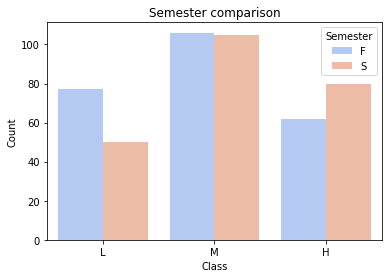

In [16]:
# Semester comparison
sem = sns.countplot(x='Class', hue='Semester', order=['L', 'M', 'H'], data=edm, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.show()

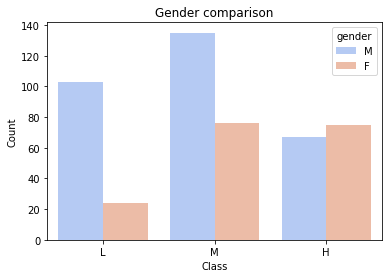

In [17]:
# gender comparison
plot = sns.countplot(x='Class', hue='gender', data=edm, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

# Preprocessing and Feature Engineering

# Removing features with low variance

In [7]:
from sklearn.feature_selection import VarianceThreshold
sel_var = VarianceThreshold(threshold=(.7 * (1 - .7)))
sel_var.fit(X_train, y_train)
# transform training set


VarianceThreshold(threshold=0.21000000000000002)

([], <a list of 0 Text yticklabel objects>)

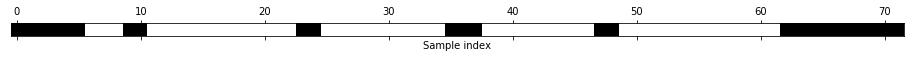

In [8]:
import matplotlib.pyplot as plt
# visualize the mask. black is True, white is False
mask = sel_var.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [9]:
X_train_lv = sel_var.transform(X_train)
X_test_lv = sel_var.transform(X_test)
C_param_range = [0.001,0.01,0.1,1,10,100]
plt.figure(figsize=(10, 10))


    
    # Apply logistic regression model to training data
log_reg = LogisticRegression(solver ='newton-cg',multi_class ='multinomial', C = 1,random_state = 0)

    

score = log_reg.fit(X_train_lv, y_train).score(X_test_lv, y_test)
print("Test score train for LogisticRegression on selected data  {:.3f}".format(score))


Test score train for LogisticRegression on selected data  0.808


<Figure size 720x720 with 0 Axes>

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr_predicted = log_reg.predict(X_test_lv)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n')
print_cm(confusion, ['L', 'M' ,'H'])
print(classification_report(y_test, lr_predicted, target_names=['L', 'M' ,'H']))

Logistic regression classifier (default settings)

              L     M     H 
        L  32.0   2.0   0.0 
        M   6.0  45.0   7.0 
        H   0.0   8.0  20.0 
             precision    recall  f1-score   support

          L       0.84      0.94      0.89        34
          M       0.82      0.78      0.80        58
          H       0.74      0.71      0.73        28

avg / total       0.81      0.81      0.81       120



In [11]:
C_param_range = [0.001,0.01,0.1,1,2,3,10,100]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(solver ='newton-cg',multi_class ='multinomial', C = i,random_state = 0)
    lr.fit(X_train_lv,y_train)
    
    # Predict using model
    y_pred_sepal = lr.predict(X_test_lv)
    j += 1
    print("c:",i,"Test score for LogisticRegression on orginal data: {:.2f}".format(lr.score(X_test_lv, y_test)))

c: 0.001 Test score for LogisticRegression on orginal data: 0.64
c: 0.01 Test score for LogisticRegression on orginal data: 0.73
c: 0.1 Test score for LogisticRegression on orginal data: 0.81
c: 1 Test score for LogisticRegression on orginal data: 0.81
c: 2 Test score for LogisticRegression on orginal data: 0.80
c: 3 Test score for LogisticRegression on orginal data: 0.78
c: 10 Test score for LogisticRegression on orginal data: 0.78
c: 100 Test score for LogisticRegression on orginal data: 0.78


<Figure size 720x720 with 0 Axes>

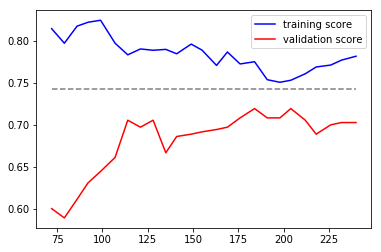

In [12]:
from sklearn.learning_curve import learning_curve



N, train_lc, val_lc = learning_curve(LogisticRegression(solver ='newton-cg',multi_class ='multinomial', C = 1,random_state = 0),
                                       X_train_lv, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

(0.5, 1)

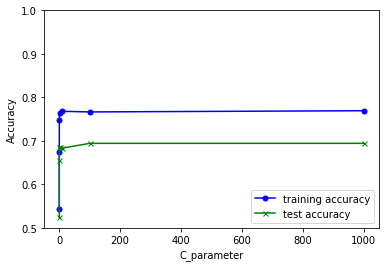

In [13]:
from sklearn.learning_curve import validation_curve
# PETAL Plot validation curve
C_param_range = [0.001,0.01,0.1,1,10,100,1000]



# PETAL Plot validation curve
lr = LogisticRegression(penalty='l2',C = 10,random_state = 0)
train_petal_scores, test_petal_scores = validation_curve(estimator=lr,X=X_train_lv,y=y_train,param_name='C',param_range=C_param_range)


train_petal_mean = np.mean(train_petal_scores,axis=1)
train_petal_std = np.std(train_petal_scores,axis=1)
test_petal_mean = np.mean(test_petal_scores,axis=1)
test_petal_std = np.std(test_petal_scores,axis=1)


plt.plot(C_param_range
            ,train_petal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_petal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])


# Recursive feature elimination

([], <a list of 0 Text yticklabel objects>)

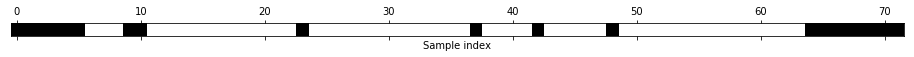

In [14]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=20)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [15]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

# Desicion Tree on selected Data

In [16]:
for i in range(4,8):
    for j in range(1,5):
        dt = DecisionTreeClassifier(min_samples_leaf=j , max_depth=i).fit(X_train_rfe, y_train)
        print('max depth=', i,'min leaf=', j, "Test score for DecisionTree on orginal data: {:.2f}".format(dt.score(X_test_rfe, y_test)))
tree_predicted = dt.predict(X_test_rfe)
confusion = confusion_matrix(y_test, tree_predicted)
print('decision tree classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('DecisionTree classification report \n')
print(classification_report(y_test, tree_predicted, target_names=['L', 'M' ,'H']))

max depth= 4 min leaf= 1 Test score for DecisionTree on orginal data: 0.79
max depth= 4 min leaf= 2 Test score for DecisionTree on orginal data: 0.79
max depth= 4 min leaf= 3 Test score for DecisionTree on orginal data: 0.79
max depth= 4 min leaf= 4 Test score for DecisionTree on orginal data: 0.79
max depth= 5 min leaf= 1 Test score for DecisionTree on orginal data: 0.80
max depth= 5 min leaf= 2 Test score for DecisionTree on orginal data: 0.81
max depth= 5 min leaf= 3 Test score for DecisionTree on orginal data: 0.81
max depth= 5 min leaf= 4 Test score for DecisionTree on orginal data: 0.81
max depth= 6 min leaf= 1 Test score for DecisionTree on orginal data: 0.80
max depth= 6 min leaf= 2 Test score for DecisionTree on orginal data: 0.80
max depth= 6 min leaf= 3 Test score for DecisionTree on orginal data: 0.78
max depth= 6 min leaf= 4 Test score for DecisionTree on orginal data: 0.79
max depth= 7 min leaf= 1 Test score for DecisionTree on orginal data: 0.78
max depth= 7 min leaf= 2 

In [17]:

dt = DecisionTreeClassifier(min_samples_leaf=2 , max_depth=6).fit(X_train_rfe, y_train)
print( "Test score for DecisionTree on orginal data: {:.2f}".format(dt.score(X_test_rfe, y_test)))
tree_predicted = dt.predict(X_test_rfe)
confusion = confusion_matrix(y_test, tree_predicted)
print('decision tree classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('DecisionTree classification report \n')
print(classification_report(y_test, tree_predicted, target_names=['L', 'M' ,'H']))

Test score for DecisionTree on orginal data: 0.80
decision tree classifier 

              L     M     H 
        L  30.0   4.0   0.0 
        M   4.0  48.0   6.0 
        H   0.0  10.0  18.0 


DecisionTree classification report 

             precision    recall  f1-score   support

          L       0.88      0.88      0.88        34
          M       0.77      0.83      0.80        58
          H       0.75      0.64      0.69        28

avg / total       0.80      0.80      0.80       120



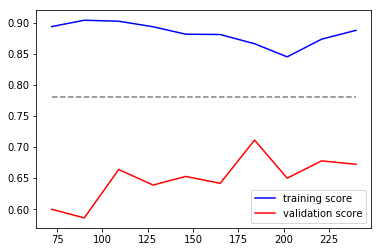

In [18]:
N, train_lc, val_lc = learning_curve(DecisionTreeClassifier(max_depth=6,min_samples_leaf=2),
                                       X_train_rfe, y_train,
                                         train_sizes=np.linspace(0.3, 1,10))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

[0.06886725 0.26148266 0.11577678 0.08772163 0.03532819 0.00993542
 0.02270953 0.00993542 0.02065438 0.01916741 0.02008239 0.00638706
 0.00567738 0.0383061  0.02190648 0.03565165 0.01642386 0.00156128
 0.         0.20242514]


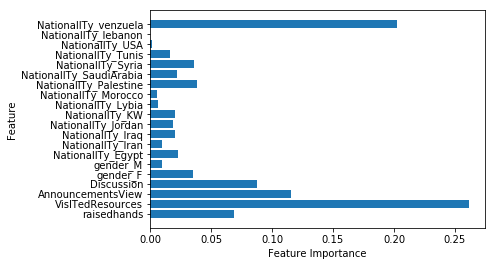

In [19]:
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X_train_rfe, y_train)
print(clf_all.feature_importances_)

import numpy as np
n_features = data_dummies.shape[1]
plt.barh(range(20), clf_all.feature_importances_, align='center')
plt.yticks(np.arange(20), data_dummies.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# SVM on selected data

In [20]:
for i in [1,5,10,100]:
    svm = SVC(kernel='linear', C=i).fit(X_train_rfe, y_train)
    print('i :',i, "Test score for SVM on orginal data: {:.2f}".format(svm.score(X_test_rfe, y_test)))
svm_predicted = svm.predict(X_test_rfe)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n')
print_cm(confusion, ['L', 'M' ,'H'])


print('\n')
print('SVM classification report \n')
print(classification_report(y_test, svm_predicted, target_names=['L', 'M' ,'H']))



i : 1 Test score for SVM on orginal data: 0.78
i : 5 Test score for SVM on orginal data: 0.78
i : 10 Test score for SVM on orginal data: 0.77
i : 100 Test score for SVM on orginal data: 0.77
Support vector machine classifier (linear kernel, C=1)

              L     M     H 
        L  29.0   5.0   0.0 
        M   6.0  45.0   7.0 
        H   0.0  10.0  18.0 


SVM classification report 

             precision    recall  f1-score   support

          L       0.83      0.85      0.84        34
          M       0.75      0.78      0.76        58
          H       0.72      0.64      0.68        28

avg / total       0.77      0.77      0.77       120



In [ ]:
## best score

svm = SVC(kernel='linear', C=1).fit(X_train_rfe, y_train)
print( "Test score for SVM on orginal data: {:.2f}".format(svm.score(X_test_rfe, y_test)))
svm_predicted = svm.predict(X_test_rfe)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=10)\n')
print_cm(confusion, ['L', 'M' ,'H'])


print('\n')
print('SVM classification report \n')
print(classification_report(y_test, svm_predicted, target_names=['L', 'M' ,'H']))

N, train_lc, val_lc = learning_curve(SVC(kernel='linear', C=10),
                                       X_train_rfe, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

Test score for SVM on orginal data: 0.78
Support vector machine classifier (linear kernel, C=10)

              L     M     H 
        L  30.0   4.0   0.0 
        M   5.0  46.0   7.0 
        H   0.0  10.0  18.0 


SVM classification report 

             precision    recall  f1-score   support

          L       0.86      0.88      0.87        34
          M       0.77      0.79      0.78        58
          H       0.72      0.64      0.68        28

avg / total       0.78      0.78      0.78       120



In [20]:
#Cross-validation
from sklearn.model_selection import cross_val_score


# accuracy is the default scoring metric
scores = cross_val_score(svm, X_train_rfe, y_train, cv=5)
print('Cross-validation (accuracy)', scores)

print("Average cross-validation score (recall) : {:.2f}".format(scores.mean()))

Cross-validation (accuracy) [0.71232877 0.7260274  0.82191781 0.73239437 0.72857143]
Average cross-validation score (recall) : 0.74


# SVM Poly Kernal on selected data

In [21]:
degree1, degree2,degree3,degree4 = 2,5,7,10
C1, C2,C3,C4 = 1, 5,10,50
hyperparams = (degree1, C1), (degree2, C1), (degree3, C1), (degree4, C1),(degree1, C2), (degree2, C2), (degree3, C2), (degree4, C2),(degree1, C3), (degree2, C3), (degree3, C3), (degree4, C3), (degree1, C4), (degree2, C4), (degree3, C4), (degree4, C4)

svm_clfs = []
for degree, C in hyperparams:
        poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=degree, coef0=1, C=C))
        ])
    

        poly_kernel_svm_clf.fit(X_train_rfe, y_train)
        print('degree :',degree,'C:',C, "Test score for SVM on orginal data: {:.2f}".format(poly_kernel_svm_clf.score(X_test_rfe, y_test)))
        
        


/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

degree : 2 C: 1 Test score for SVM on orginal data: 0.78
degree : 5 C: 1 Test score for SVM on orginal data: 0.78
degree : 7 C: 1 Test score for SVM on orginal data: 0.73
degree : 10 C: 1 Test score for SVM on orginal data: 0.76
degree : 2 C: 5 Test score for SVM on orginal data: 0.79
degree : 5 C: 5 Test score for SVM on orginal data: 0.74
degree : 7 C: 5 Test score for SVM on orginal data: 0.74
degree : 10 C: 5 Test score for SVM on orginal data: 0.76
degree : 2 C: 10 Test score for SVM on orginal data: 0.80
degree : 5 C: 10 Test score for SVM on orginal data: 0.74
degree : 7 C: 10 Test score for SVM on orginal data: 0.74
degree : 10 C: 10 Test score for SVM on orginal data: 0.76
degree : 2 C: 50 Test score for SVM on orginal data: 0.76
degree : 5 C: 50 Test score for SVM on orginal data: 0.75
degree : 7 C: 50 Test score for SVM on orginal data: 0.74
degree : 10 C: 50 Test score for SVM on orginal data: 0.76


/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Test score for SVM on orginal data: 0.80
0.9583333333333334
Support vector machine classifier (linear kernel, C=1)

              L     M     H 
        L  29.0   5.0   0.0 
        M   2.0  52.0   4.0 
        H   0.0  13.0  15.0 


SVM classification report 

             precision    recall  f1-score   support

          L       0.94      0.85      0.89        34
          M       0.74      0.90      0.81        58
          H       0.79      0.54      0.64        28

avg / total       0.81      0.80      0.79       120



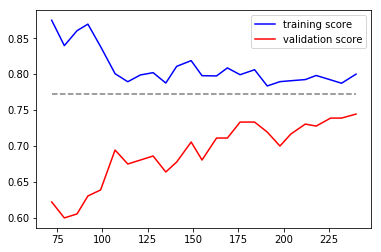

In [23]:
#best scor

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=10))
        ])
    
poly_kernel_svm_clf.fit(X_train_rfe, y_train)
print( "Test score for SVM on orginal data: {:.2f}".format(poly_kernel_svm_clf.score(X_test_rfe, y_test)))
print(poly_kernel_svm_clf.score(X_train_rfe, y_train))
svm_predicted = poly_kernel_svm_clf.predict(X_test_rfe)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n')
print_cm(confusion, ['L', 'M' ,'H'])


print('\n')
print('SVM classification report \n')
print(classification_report(y_test, svm_predicted, target_names=['L', 'M' ,'H']))

N, train_lc, val_lc = learning_curve(SVC(kernel="poly", degree=1, coef0=1, C=10),
                                       X_train_rfe, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')
        

# SVM Gaussian Kernal on selected data

In [25]:
gamma1, gamma2,gamma3,gamma4 = 0.1,5,10,2
C1, C2,C3,C4 = 0.0001, 5,10,50
hyperparams = (gamma1, C1), (gamma2, C1), (gamma3, C1), (gamma4, C1),(gamma1, C2), (gamma2, C2), (gamma3, C2), (gamma4, C2),(gamma1, C3), (gamma2, C3), (gamma3, C3), (gamma4, C3), (gamma1, C4), (gamma2, C4), (gamma3, C4), (gamma4, C4)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X_train_rfe, y_train)
    print('gamma :',gamma,'C:',C, "Test score for SVM on orginal data: {:.2f}".format(rbf_kernel_svm_clf.score(X_test_rfe, y_test)))



/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

gamma : 0.1 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 5 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 10 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 2 C: 0.0001 Test score for SVM on orginal data: 0.48
gamma : 0.1 C: 5 Test score for SVM on orginal data: 0.75
gamma : 5 C: 5 Test score for SVM on orginal data: 0.53
gamma : 10 C: 5 Test score for SVM on orginal data: 0.52
gamma : 2 C: 5 Test score for SVM on orginal data: 0.53
gamma : 0.1 C: 10 Test score for SVM on orginal data: 0.77
gamma : 5 C: 10 Test score for SVM on orginal data: 0.53
gamma : 10 C: 10 Test score for SVM on orginal data: 0.52
gamma : 2 C: 10 Test score for SVM on orginal data: 0.53
gamma : 0.1 C: 50 Test score for SVM on orginal data: 0.73
gamma : 5 C: 50 Test score for SVM on orginal data: 0.53
gamma : 10 C: 50 Test score for SVM on orginal data: 0.52
gamma : 2 C: 50 Test score for SVM on orginal data: 0.53


/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

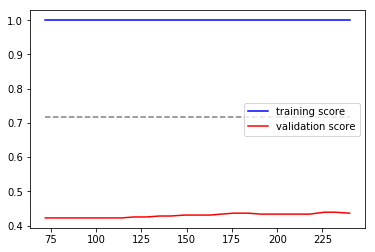

In [26]:
N, train_lc, val_lc = learning_curve(SVC(kernel="rbf", gamma=0.1, C=10),
                                       X_train_rfe, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

# Nearest Neighbors Classification

In [27]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap
n_neighbors = 5

h = .02  # step size in the mesh


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train_rfe, y_train)
    y_pred = clf.predict(X_test_rfe)
    print(weights,"Test score for KNN on orginal data: {:.2f}".format(clf.score(X_test_rfe, y_test)))
   

uniform Test score for KNN on orginal data: 0.69
distance Test score for KNN on orginal data: 0.67


Random Forests classifier 

              L     M     H 
        L  28.0   5.0   1.0 
        M   9.0  35.0  14.0 
        H   1.0  10.0  17.0 


Random Forests classification report 

             precision    recall  f1-score   support

          L       0.74      0.82      0.78        34
          M       0.70      0.60      0.65        58
          H       0.53      0.61      0.57        28

avg / total       0.67      0.67      0.67       120



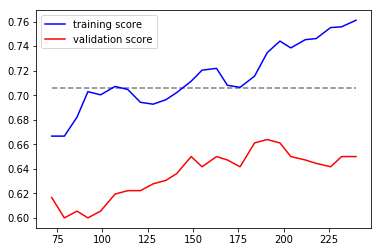

In [28]:
confusion = confusion_matrix(y_test, y_pred)

print('Random Forests classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('Random Forests classification report \n')
print(classification_report(y_test, y_pred, target_names=['L', 'M' ,'H']))


N, train_lc, val_lc = learning_curve(neighbors.KNeighborsClassifier(n_neighbors, weights='uniform'),
                                       X_train_rfe, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

# Voting classifiers

Accuracy of LogisticRegression classifier on training set: 0.76
Accuracy of LogisticRegression classifier on test set: 0.78

Accuracy of DecisionTreeClassifier classifier on training set: 1.00
Accuracy of DecisionTreeClassifier classifier on test set: 0.76

Accuracy of GaussianNB classifier on training set: 0.74
Accuracy of GaussianNB classifier on test set: 0.79

Accuracy of VotingClassifier classifier on training set: 0.85
Accuracy of VotingClassifier classifier on test set: 0.81



/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

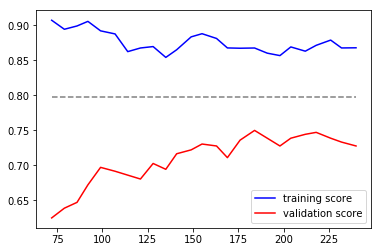

In [29]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
dtclf = DecisionTreeClassifier(random_state = 42)

lgclf = LogisticRegression(random_state = 42)



from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', lgclf), ('dt', dtclf), ('nb', nbclf)],
    voting='hard')
voting_clf.fit(X_train_rfe, y_train)



from sklearn.metrics import accuracy_score

for clf in (lgclf, dtclf, nbclf, voting_clf):
    clf.fit(X_train_rfe, y_train)
    y_pred = clf.predict(X_test_rfe)
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('Accuracy of {} classifier on training set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_train_rfe, y_train)))
    print('Accuracy of {} classifier on test set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_test_rfe, y_test)))
    print()
    
    
    
    
N, train_lc, val_lc = learning_curve(VotingClassifier(estimators=[('lr', lgclf), ('dt', dtclf), ('nb', nbclf)],voting='hard'),
                                       X_train_rfe, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')

# Random Forests

Test score for Random Forests on orginal data: 0.81
Random Forests classifier 

              L     M     H 
        L  31.0   3.0   0.0 
        M   5.0  47.0   6.0 
        H   0.0   9.0  19.0 


Random Forests classification report 

             precision    recall  f1-score   support

          L       0.86      0.91      0.89        34
          M       0.80      0.81      0.80        58
          H       0.76      0.68      0.72        28

avg / total       0.81      0.81      0.81       120

e:  1 Test score for Random Forests on orginal data: 0.68
e:  10 Test score for Random Forests on orginal data: 0.80
e:  50 Test score for Random Forests on orginal data: 0.82
e:  100 Test score for Random Forests on orginal data: 0.82
e:  200 Test score for Random Forests on orginal data: 0.81
e:  300 Test score for Random Forests on orginal data: 0.81
e:  400 Test score for Random Forests on orginal data: 0.81
e:  500 Test score for Random Forests on orginal data: 0.81


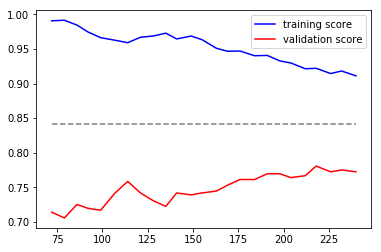

In [30]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42,max_leaf_nodes=16),
    n_estimators=500,max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train_rfe, y_train)
y_pred = bag_clf.predict(X_test_rfe)

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=16, n_jobs=-1, random_state=52)
rnd_clf.fit(X_train_rfe, y_train)
print("Test score for Random Forests on orginal data: {:.2f}".format(rnd_clf.score(X_test_rfe, y_test)))
y_pred_rf = rnd_clf.predict(X_test_rfe)


np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

confusion = confusion_matrix(y_test, y_pred_rf)

print('Random Forests classifier \n')
print_cm(confusion, ['L', 'M' ,'H'])
print('\n')
print('Random Forests classification report \n')
print(classification_report(y_test, y_pred_rf, target_names=['L', 'M' ,'H']))






estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52,max_leaf_nodes=16, n_jobs=-1)
    rfc1.fit(X_train_rfe, y_train)
    print('e: ', e,"Test score for Random Forests on orginal data: {:.2f}".format(rfc1.score(X_test_rfe, y_test)))
    
    
    

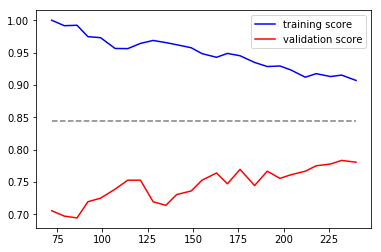

In [31]:
N, train_lc, val_lc = learning_curve(RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, random_state=42),
                                       X_train_rfe, y_train,
                                         train_sizes=np.linspace(0.3, 1, 25))
                                     
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

#plt.set_ylim(0, 1)
#plt.set_xlim(N[0], N[-1])


plt.legend(loc='best')